# **Data Preprocessing**


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Loading dataset
file_path = '/content/drive/MyDrive/#Datasets/osteoporosis1.csv'
osteoporosis_df = pd.read_csv(file_path)

In [5]:
#Making a copy of original for analysis
df=osteoporosis_df.copy()

In [6]:
# first few rows
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [7]:
# Finding Non-null counts and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

Null values exist in columns 11,12,13

In [8]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

,0
Id,0
Age,0
Gender,0
Hormonal Changes,0
Family History,0
Race/Ethnicity,0
Body Weight,0
Calcium Intake,0
Vitamin D Intake,0
Physical Activity,0


In [9]:
#Finding counts after dropping null values
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 1952
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   317 non-null    int64 
 1   Age                  317 non-null    int64 
 2   Gender               317 non-null    object
 3   Hormonal Changes     317 non-null    object
 4   Family History       317 non-null    object
 5   Race/Ethnicity       317 non-null    object
 6   Body Weight          317 non-null    object
 7   Calcium Intake       317 non-null    object
 8   Vitamin D Intake     317 non-null    object
 9   Physical Activity    317 non-null    object
 10  Smoking              317 non-null    object
 11  Alcohol Consumption  317 non-null    object
 12  Medical Conditions   317 non-null    object
 13  Medications          317 non-null    object
 14  Prior Fractures      317 non-null    object
 15  Osteoporosis         317 non-null    int64 
dtypes: int64(3),

In [10]:
(len(df)-len(df.dropna()))/len(df)
# We lose 84% of our data by dropping NaN, BIG PROBLEM

0.8381001021450459

# **Analyzing three columns with missing entries**

In [11]:
#Into columns missing entries;
df[['Medications','Alcohol Consumption','Medical Conditions']].nunique()

,0
Medications,1
Alcohol Consumption,1
Medical Conditions,2


 Medications and Alcohol Consumption columns have only one unique value, besides missing values so we drop the columns entirely since they wont add any insights to our analysis.\
Medical Conditions column has more than one unique values so wont be dropped. We will impute with the mode to start with.

In [12]:
#Checking for other low-dimensionality columns.
df.nunique()

,0
Id,1749
Age,73
Gender,2
Hormonal Changes,2
Family History,2
Race/Ethnicity,3
Body Weight,2
Calcium Intake,2
Vitamin D Intake,2
Physical Activity,2


All other values have more than 1 unique values so wont be dropped as well

In [13]:
#Dropping low-dimensionality columns
low_dimensionality_columns = ["Alcohol Consumption","Medications"]
df = df.drop(columns = low_dimensionality_columns)
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Medical Conditions,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Rheumatoid Arthritis,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Hyperthyroidism,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,Rheumatoid Arthritis,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Rheumatoid Arthritis,Yes,1


In [14]:
# Imputing medical conditions column with mode.
mode_value = df["Medical Conditions"].mode()[0]
df["Medical Conditions"].fillna(mode_value, inplace=True)

# Verifying that all missing values have been imputed
assert all(df.isnull().sum() ==0)

In [15]:
df["Medical Conditions"].value_counts()

,count
Medical Conditions,
Hyperthyroidism,1325
Rheumatoid Arthritis,633


In [16]:
# Dropping the 'Id' column since it's not relevant for modeling
df = df.drop(columns=['Id'])
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Medical Conditions,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Rheumatoid Arthritis,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,Hyperthyroidism,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Hyperthyroidism,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,Rheumatoid Arthritis,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Rheumatoid Arthritis,Yes,1


In [17]:
# Removing duplicated rows
df.duplicated().sum()
df.drop_duplicates(keep='first',inplace=True)
df.shape

(1944, 13)

In [18]:
# Verifying that we have 13 columns, no missing values and no duplicates
assert df.shape[1]==13
assert all(df.isnull().sum()==0)
assert df.duplicated().sum()==0

# **Age Analysis**

In [19]:
#Checking for class imbalance
majority_class_size, minority_class_size = df['Osteoporosis'].value_counts()
majority_class_size, minority_class_size

(977, 967)

Shows only a small extent of class imbalance

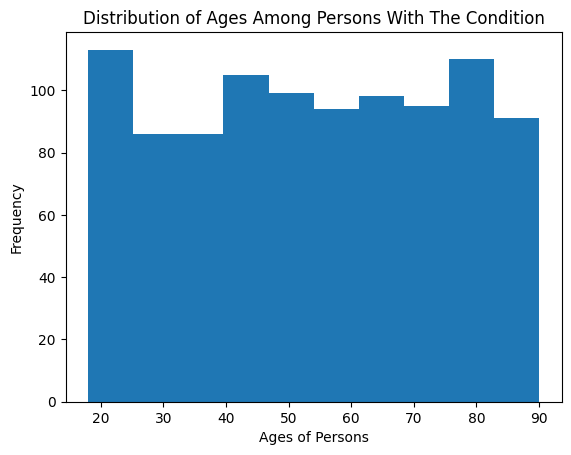

In [20]:
#Plotting Age distributions for both classes (1. The positive class)
import matplotlib.pyplot as plt
import seaborn as sns
positive_class,negative_class = df[df['Osteoporosis']==1],df[df['Osteoporosis']==0]
plt.hist(positive_class['Age'])
plt.xlabel('Ages of Persons')
plt.ylabel('Frequency')
plt.title("Distribution of Ages Among Persons With The Condition");

Ages of person with the condition are distributed almost uniformly, but highest at around the ages of 20 and of 80.

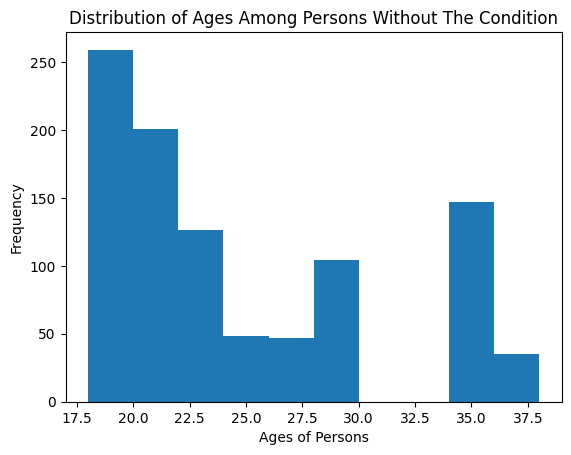

In [21]:
#Plotting Age distributions for both classes (1. The negative class)
plt.hist(negative_class['Age'])
plt.xlabel("Ages of Persons")
plt.ylabel('Frequency')
plt.title("Distribution of Ages Among Persons Without The Condition");

Numbers of persons without the condition generally decreases with age

In [22]:
# Determining correlation between Age and developing the condition
float(df['Age'].corr(df['Osteoporosis']))

0.6904462320288809

There's an appreciable correlation between age and Osteoporosis status

Text(0.5, 1.0, 'Mean Values for both pos. and neg. classes of the target variable')

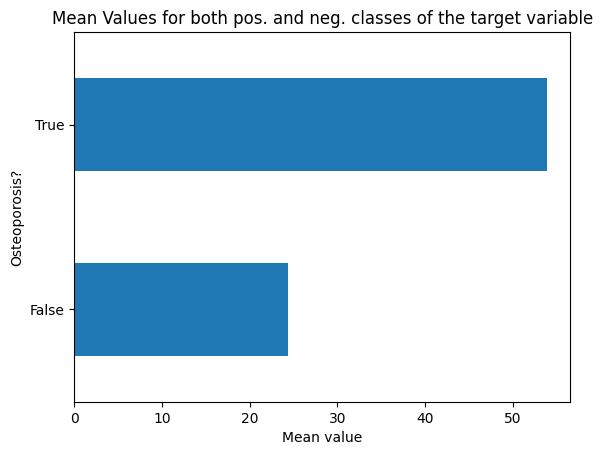

In [23]:
# Showing mean ages of pos. and neg. classes using a pivot table and plot
df['Osteoporosis?']=df['Osteoporosis'].astype(bool)
age_pivot = pd.pivot_table(df, index = "Osteoporosis?", values = "Age", aggfunc = "mean")
age_pivot.plot(kind="barh", legend= None)
plt.xlabel("Mean value")
plt.title("Mean Values for both pos. and neg. classes of the target variable")

The mean age of persons with the condition is much higher than that of those without

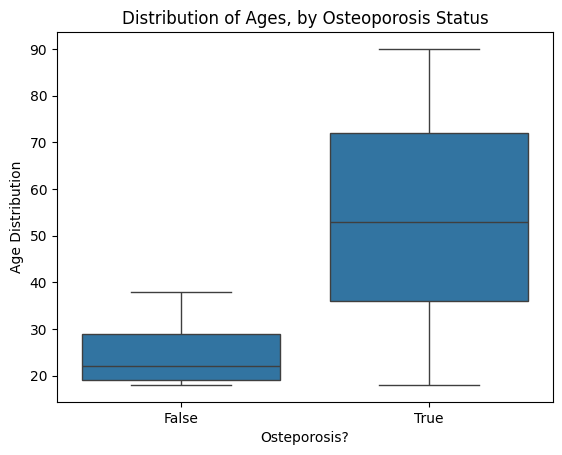

In [24]:
# Creating side-by-side boxplots to show age distribution for both classes (pos. and neg.)
df['Osteoporosis?']=df['Osteoporosis'].astype(bool)
sns.boxplot(x="Osteoporosis?",y="Age",data=df)
plt.xlabel("Osteporosis?")
plt.ylabel("Age Distribution")
plt.title("Distribution of Ages, by Osteoporosis Status");

This plot confirms that older persons are more liable to developing the condition

# **Model 1: Logistic Regression**

In [106]:
!pip install category_encoders

In [25]:
# Importing relevant modules
import numpy as np
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [27]:
#Dropping Osteoporosis?
df = df.drop(columns=["Osteoporosis?"])

In [28]:
#Splitting into feature matrix and target vector
target = 'Osteoporosis'
X=df.drop(columns=target)
y=df[target]

In [29]:
# Train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape);

X_train shape: (1555, 12)
y_train shape: (1555,)
X_test shape: (389, 12)
y_test shape: (389,)


In [30]:
# Choosing the probability for the majority class for our baseline..
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.51


We have a baseline accuracy of 51%

In [31]:
#Pipeline for encoding and model building.
model = make_pipeline(
OneHotEncoder(use_cat_names=True),
LogisticRegression(max_iter=1000)
)

#fitting model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Hormonal Changes',
                                     'Family History', 'Race/Ethnicity',
                                     'Body Weight', 'Calcium Intake',
                                     'Vitamin D Intake', 'Physical Activity',
                                     'Smoking', 'Medical Conditions',
                                     'Prior Fractures'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [32]:
#Calculating the training and test accuracy scores for model
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)
print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.82
Test Accuracy: 0.82


Obtained a model accuracy of 82% for both training and test, the model generalized well since test accuracy is
close with training accuracy....Overall performance may be improvable even though it beats the baseline of 51%

In [33]:
# Veiwing probabilities for first few predictions for test set
y_train_pred_proba = model.predict_proba(X_test)
print(y_train_pred_proba[:5])

[[0.91937809 0.08062191]
 [0.63495913 0.36504087]
 [0.75188978 0.24811022]
 [0.91450739 0.08549261]
 [0.59902417 0.40097583]]


Text(0.5, 0, 'Odds Ratio')

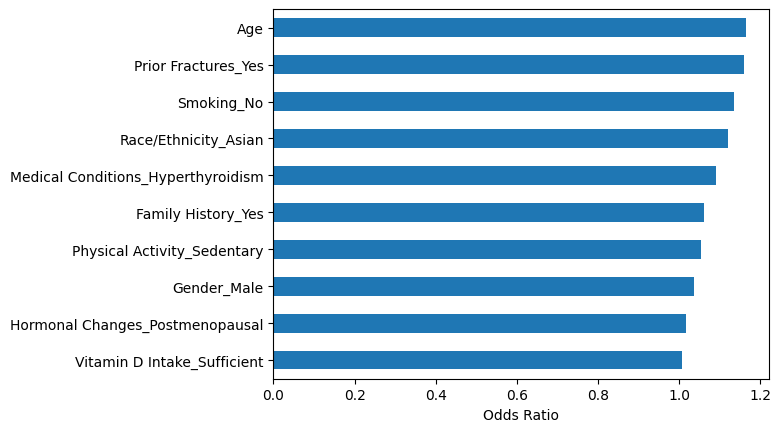

In [34]:
#Extracting model features and importances
features = model.named_steps["onehotencoder"].get_feature_names_out()
importances = model.named_steps['logisticregression'].coef_[0]

# Now creating a pandas series of the relevant measures
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()

# Plotting the Odd ratios in a horizontal bar chart of top 10 important features
odds_ratios.tail(10).plot(kind="barh")
plt.xlabel("Odds Ratio")

In [35]:
#Interpretations
categories = list(odds_ratios.sort_values(ascending=False).index)[:10]
values = list(odds_ratios.sort_values(ascending=False))[:10]
values[1], values[5], values[6], values[9]

(1.1592428450769394, 1.0605872333391, 1.0543555059037455, 1.0081012552867437)

The odd ratio represent how many times likely a category is to belong to the positive class than average.
And odds ratio of over 1 suggests an increased chance of belonging to the positive class. Hence from the above, it is seen that a person is 16% more likely than average to develop the condition if they have had prior fractures(all other things being equal), 6% more likely if they have a family history and 5% more likely if they only undertake sedentary physical activity, etc....
Other insights here are contrary to research which inform further analysis and improvement of the model.
For example females are supposed to be more likely to develop the condition rather than males as seen here.
Also Sufficient Vitamin D intake should decreases likelihood of the condition more than the insufficient intake.

,Osteoporosis
Race/Ethnicity,
African American,0.505900
Asian,0.502408
Caucasian,0.499222


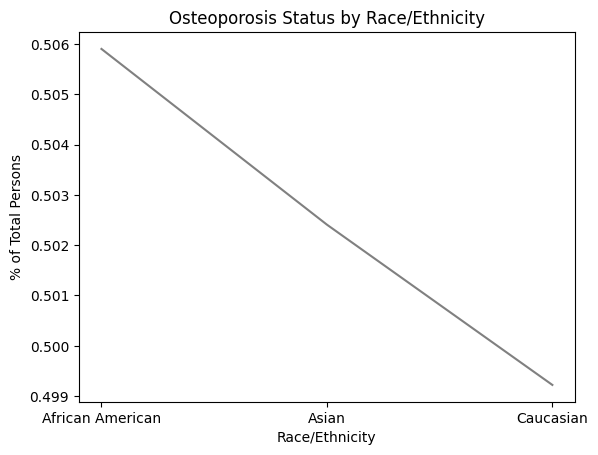

In [36]:
# From the odds ratios Race/Ethinicity is featured
# Analyzing osteoporosis status by race, by aggregating
ost_by_race = (
df.groupby("Race/Ethnicity")["Osteoporosis"].mean().sort_values(ascending=False)
).to_frame()

#Plotting out
plt.plot(ost_by_race.values, color = "grey")
plt.xticks(range(len(ost_by_race)),labels = ost_by_race.index)
# plt.yticks(np.arange(0.495,0.51,0.001))
plt.xlabel("Race/Ethnicity")
plt.ylabel("% of Total Persons")
plt.title("Osteoporosis Status by Race/Ethnicity");

ost_by_race


The race with the highest proportion of its person with the condition is the African-American followed by The Asian Race and then by the Caucasian.

# **Model 2: Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
model_dt = make_pipeline(
OneHotEncoder(use_cat_names = True),
DecisionTreeClassifier(random_state = 42)
)

In [38]:
# Fitting and evaluating performance score
model_dt.fit(X_train, y_train)
acc_train = model_dt.score(X_train,y_train)
acc_test = model_dt.score(X_test,y_test)
print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9974
Test Accuracy: 0.8483


Great scores for accuracies, just the test accuracy is a little too less than the training accuracy. The model probably does not generalize very well due to overfitting. We  conduct some hyparameter tuning on the tree depth.

In [39]:
#Hyperparameter tuning
# Extracting depth
tree_depth = model_dt.named_steps['decisiontreeclassifier'].get_depth()
tree_depth


17

Tree depth was 17

In [40]:
#Tuning
depth_hyperparams = range(2,30,2)

# Creating empty lists for training and validation accuracy scores
training_acc_dt = []
test_acc_dt = []

for d in depth_hyperparams:
    # Creating model with max_depth' of 'd'
    test_model = make_pipeline( OneHotEncoder(),
                              DecisionTreeClassifier(max_depth = d, random_state=42) )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to ‘training_acc‘
    training_acc_dt.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to ‘training_acc‘
    test_acc_dt.append(test_model.score(X_test,y_test))

print("Training Accuracy Scores:", training_acc_dt[:3])
print("Validation Accuracy Scores:", test_acc_dt[:3])

Training Accuracy Scores: [0.8559485530546623, 0.8694533762057878, 0.8983922829581994]
Validation Accuracy Scores: [0.8663239074550129, 0.8791773778920309, 0.897172236503856]


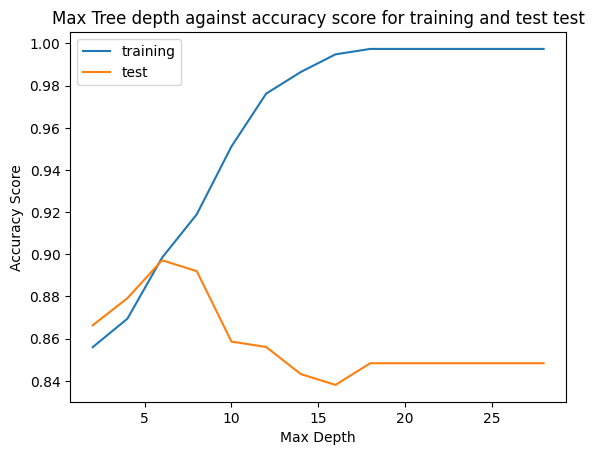

In [41]:
# Creating a visualization for the depth hyperparameter tuning
plt.plot(depth_hyperparams, training_acc_dt, label="training")
plt.plot(depth_hyperparams, test_acc_dt, label="test")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title('Max Tree depth against accuracy score for training and test test')
plt.legend();

From the graph, our optimal depth that does not result in overfitting is 6.

In [42]:
# Creating the optimal model with a depth of 6
final_dt_model = make_pipeline( OneHotEncoder(),
                              DecisionTreeClassifier(max_depth = 6, random_state=42) )
final_dt_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Hormonal Changes',
                                     'Family History', 'Race/Ethnicity',
                                     'Body Weight', 'Calcium Intake',
                                     'Vitamin D Intake', 'Physical Activity',
                                     'Smoking', 'Medical Conditions',
                                     'Prior Fractures'])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [43]:
final_dt_model.score(X_train,y_train),final_dt_model.score(X_test,y_test)

(0.8983922829581994, 0.897172236503856)

Model has about 90% accuracy scores for both training and test sets.

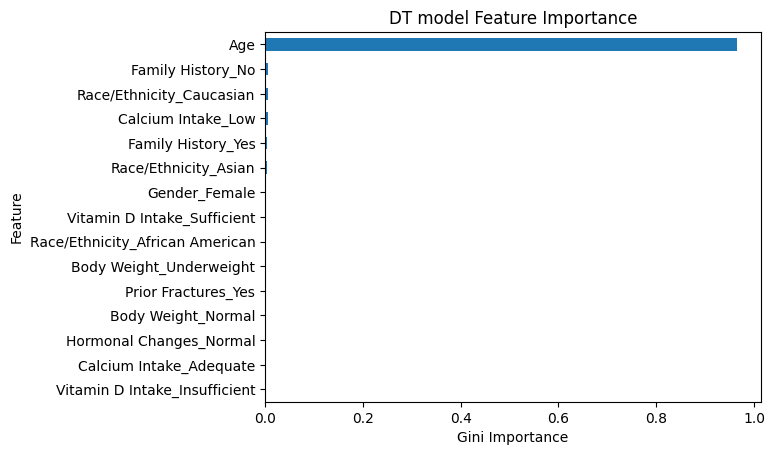

In [44]:
# Extracting feature importances and plotting them
# Getting importances
importances_dt = final_dt_model.named_steps['decisiontreeclassifier'].feature_importances_
features_dt = final_dt_model.named_steps["onehotencoder"].get_feature_names_out()

# Putting importances into a Series
feat_imp_dt = pd.Series(importances_dt, index = features).sort_values()

# Plotting series
feat_imp_dt.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("DT model Feature Importance");

Shows increasing Age, low calcium intake, female for gender and Asian for race/ethnicity are some top contributing factors affecting the development of the condition...
Family history may not be too big of a factor since both yes and no occur closely and arent very different in Gini importances...Oddly Sufficient Vitamin-D intake rather is more related with the condition that insufficient. (Probably not by causation).
It is also seen that age explains a lot of the variability of the target variable.(Also as shown below)

In [45]:
#Showing all importances
feat_imp_dt.tail(15).sort_values(ascending=False)

,0
Age,0.965816
Family History_No,0.006105
Race/Ethnicity_Caucasian,0.005718
Calcium Intake_Low,0.005510
Family History_Yes,0.003714
Race/Ethnicity_Asian,0.003089
Gender_Female,0.002942
Vitamin D Intake_Sufficient,0.001892
Race/Ethnicity_African American,0.001711
Body Weight_Underweight,0.001625


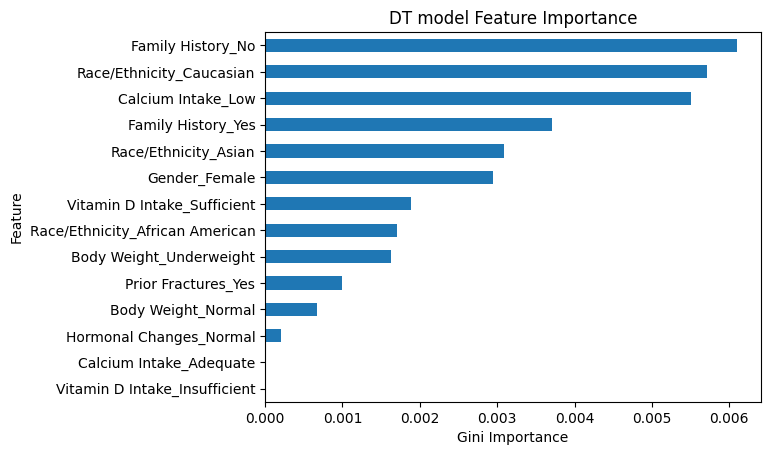

In [46]:
#Plotting gini barplot without "Age" to have a proper look
feat_imp_dt.tail(15)[:-1].plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("DT model Feature Importance");

In [47]:
# Calculating Precision, Recall and F1 Score metrics
import sklearn.metrics as metrics
print("Precision:", "%.6f" % metrics.precision_score(y_test, final_dt_model.predict(X_test)))
print("Recall:", "%.6f" % metrics.recall_score(y_test, final_dt_model.predict(X_test)))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, final_dt_model.predict(X_test)))

Precision: 0.946746
Recall: 0.837696
F1 Score: 0.888889


Great Scores!

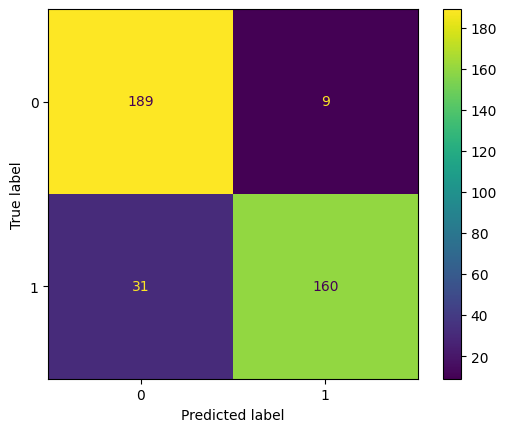

In [48]:
# Plotting a confusion matrix
ConfusionMatrixDisplay.from_estimator(final_dt_model, X_test, y_test);

# **Model 3: Random Forest**


In [49]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [50]:
#Instantiating model pipeline
clf = make_pipeline(
OneHotEncoder(),
RandomForestClassifier(random_state =42)
)

In [51]:
# Defining tuning parameters
params = {
"randomforestclassifier__n_estimators": range(25,100,25),
"randomforestclassifier__max_depth": range(10,50,10)
}

In [53]:
# GridSearch
model_rf = GridSearchCV(
clf,
param_grid = params,
cv = 5,
n_jobs = -1,
verbose = 1
)
model_rf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [54]:
# Training model on training set
model_rf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [55]:
# Collecting results into a dataframe
cv_results = pd.DataFrame(model_rf.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.488905,0.090940,0.088609,0.029769,10,25,"{'randomforestclassifier__max_depth': 10, 'ran...",0.823151,0.762058,0.807074,0.845659,0.832797,0.814148,0.028932,12
1,0.611670,0.029075,0.050432,0.002979,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.832797,0.784566,0.823151,0.864952,0.823151,0.825723,0.025675,2
2,0.696781,0.125072,0.086824,0.034963,10,75,"{'randomforestclassifier__max_depth': 10, 'ran...",0.829582,0.800643,0.816720,0.864952,0.836013,0.829582,0.021426,1
3,0.262714,0.010690,0.053601,0.017785,20,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.816720,0.790997,0.803859,0.858521,0.836013,0.821222,0.023855,6
4,0.358659,0.012061,0.050009,0.003605,20,50,"{'randomforestclassifier__max_depth': 20, 'ran...",0.816720,0.790997,0.810289,0.855305,0.832797,0.821222,0.021675,6
5,0.449503,0.011482,0.054893,0.001819,20,75,"{'randomforestclassifier__max_depth': 20, 'ran...",0.823151,0.803859,0.800643,0.858521,0.829582,0.823151,0.020838,3
6,0.267356,0.012491,0.044545,0.000942,30,25,"{'randomforestclassifier__max_depth': 30, 'ran...",0.816720,0.790997,0.803859,0.858521,0.836013,0.821222,0.023855,6
7,0.539146,0.141288,0.086876,0.036828,30,50,"{'randomforestclassifier__max_depth': 30, 'ran...",0.816720,0.790997,0.810289,0.855305,0.832797,0.821222,0.021675,6
8,1.021467,0.109120,0.094052,0.014553,30,75,"{'randomforestclassifier__max_depth': 30, 'ran...",0.823151,0.803859,0.800643,0.858521,0.829582,0.823151,0.020838,3
9,0.575420,0.046888,0.109707,0.017480,40,25,"{'randomforestclassifier__max_depth': 40, 'ran...",0.816720,0.790997,0.803859,0.858521,0.836013,0.821222,0.023855,6


In [56]:
# Extracting best hyperparameters
model_rf.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 75}

In [57]:
# Extracting best hyperparameters
model_rf.best_score_

0.8295819935691318

In [58]:
# Extracting best hyperparameters
model_rf.best_estimator_

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Hormonal Changes',
                                     'Family History', 'Race/Ethnicity',
                                     'Body Weight', 'Calcium Intake',
                                     'Vitamin D Intake', 'Physical Activity',
                                     'Smoking', 'Medical Conditions',
                                     'Prior Fractures'])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=75,
                                        random_state=42))])

In [59]:
# Acurracy Scores
acc_train = model_rf.score(X_train,y_train)
acc_test =model_rf.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9814
Test Accuracy: 0.8355


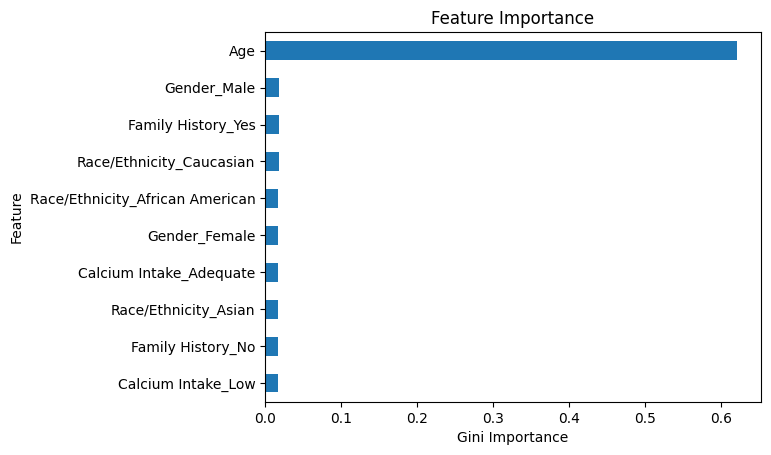

In [60]:
# Extracting importances from model
importances_rf = model_rf.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
# Creating a series with feature names and importances
feat_imp_rf = pd.Series(importances_rf,index=features).sort_values()
# Plotting 10 most important features
feat_imp_rf.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

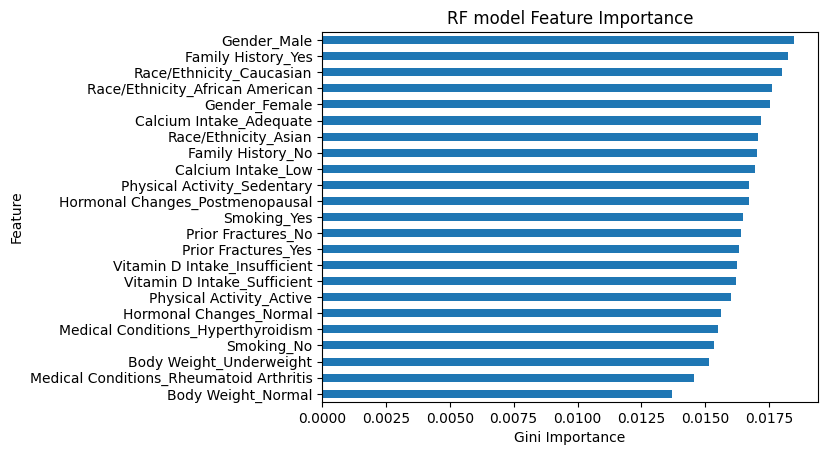

In [61]:
#Plotting gini barplot without "Age" to have a proper look
feat_imp_rf.tail(24)[:-1].plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("RF model Feature Importance");

In [62]:
# Calculating Precision, Recall and F1 Score metrics
import sklearn.metrics as metrics
print("Precision:", "%.6f" % metrics.precision_score(y_test, model_rf.predict(X_test)))
print("Recall:", "%.6f" % metrics.recall_score(y_test, model_rf.predict(X_test)))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, model_rf.predict(X_test)))

Precision: 0.875740
Recall: 0.774869
F1 Score: 0.822222


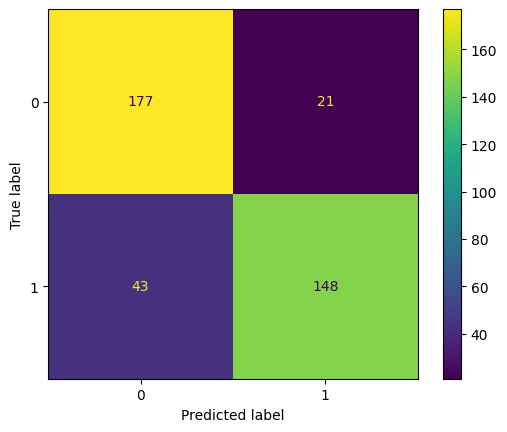

In [63]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rf,X_test,y_test);

The model is overall not better than The decision Tree

# Model 4:  **Gradient Boosting Trees**

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
#Instantiating model pipeline
clf1 = make_pipeline(
OneHotEncoder(),
GradientBoostingClassifier(random_state =42)
)

In [68]:
# Model parameters
params1 = {
"gradientboostingclassifier__n_estimators": range(20,31,5),
"gradientboostingclassifier__max_depth": range(2,9)
}

In [69]:
# GridSearching
model_gb = GridSearchCV(clf1, param_grid=params1, cv=5,verbose=1, n_jobs=-1)

In [70]:
# Fitting model to training data
model_gb.fit(X_train,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 9),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5)},
             verbose=1)

In [ ]:
# Extracting results into a df
cv_results1 = pd.DataFrame(model_gb.cv_results_)
cv_results1.head(10)

In [71]:
# Extract best hyperparameters
model_gb.best_params_

{'gradientboostingclassifier__max_depth': 6,
 'gradientboostingclassifier__n_estimators': 20}

In [72]:
# Extract best hyperparameters
model_gb.best_score_

0.907395498392283

In [74]:
#Accuracies on training and test sets
acc_train1 = model_gb.score(X_train,y_train)
acc_test1 =model_gb.score(X_test,y_test)

print("Training Accuracy:", round(acc_train1, 4))
print("Test Accuracy:", round(acc_test1, 4))

Training Accuracy: 0.917
Test Accuracy: 0.9254


In [75]:
# Calculating Precision, Recall and F1 Score metrics
print("Precision:", "%.6f" % metrics.precision_score(y_test, model_gb.predict(X_test)))
print("Recall:", "%.6f" % metrics.recall_score(y_test, model_gb.predict(X_test)))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, model_gb.predict(X_test)))

Precision: 0.982143
Recall: 0.863874
F1 Score: 0.919220


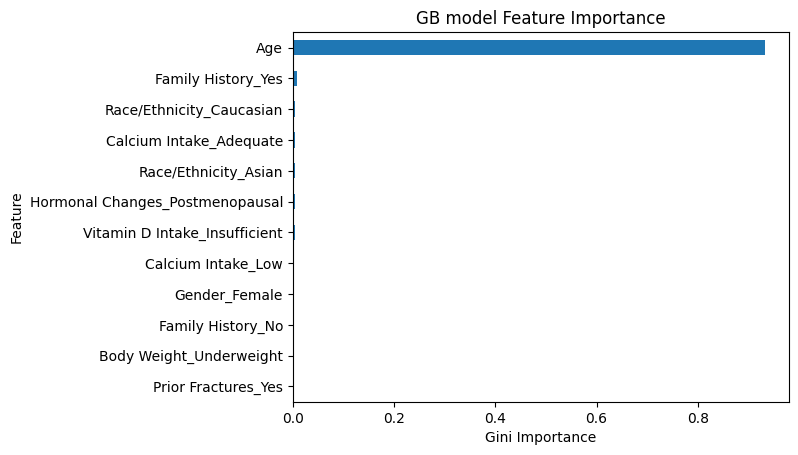

In [76]:
# Extracting importances from model
importances_gb = model_gb.best_estimator_.named_steps['gradientboostingclassifier'].feature_importances_
# Creating a series with feature names and importances
feat_imp_gb = pd.Series(importances_gb,index=features).sort_values()
# Plotting 12 most important features
feat_imp_gb.tail(12).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("GB model Feature Importance");

In [ ]:
#Showing all importances
feat_imp_gb.tail(15).sort_values(ascending=False)

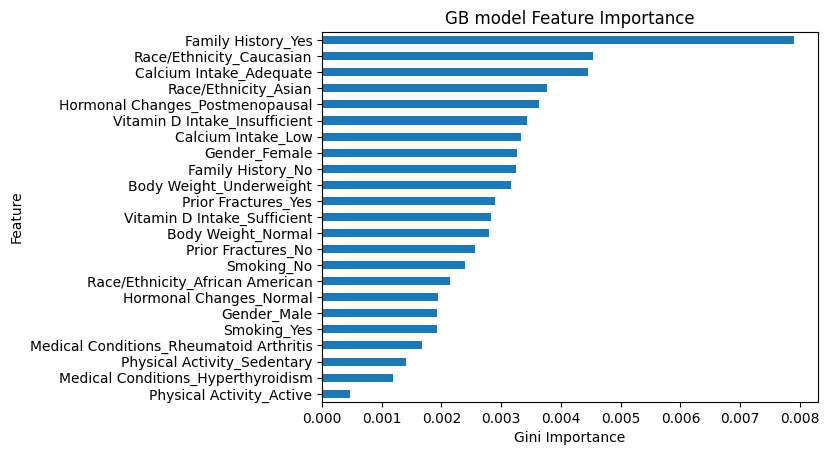

In [77]:
#Plotting gini barplot without "Age" to have a proper look
feat_imp_gb.tail(24)[:-1].plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("GB model Feature Importance");

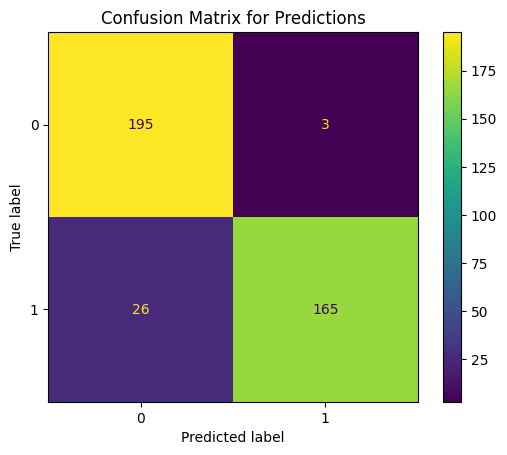

In [78]:
# Plotting a confusion matrix
ConfusionMatrixDisplay.from_estimator(model_gb, X_test, y_test)
plt.title('Confusion Matrix for Predictions');

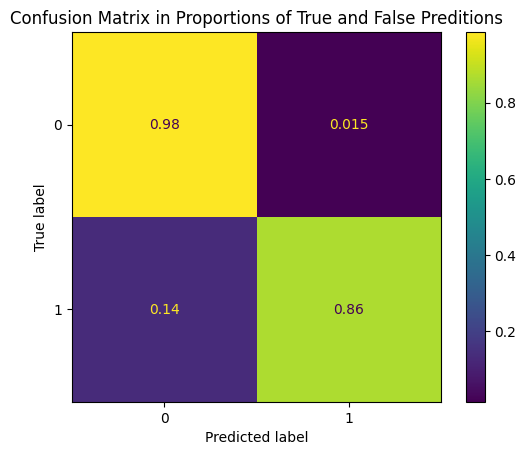

In [79]:
#Plotting as percents
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test, model_gb.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm_normalized)
disp.plot()
plt.title('Confusion Matrix in Proportions of True and False Preditions');

The model performs better than the DT and is overall best

# **Running Gradient Boosting Model With Modified Dataset**

In [82]:
#Reading original data into new df
dff = pd.read_csv('/content/drive/MyDrive/#Datasets/osteoporosis1.csv')
dff

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,106130,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,106463,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,103142,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,105187,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [83]:
#Showing info
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [84]:
#Dropping low-dimensionality columns
low_dimensionality_columns = ["Alcohol Consumption","Medications"]
dff = dff.drop(columns = low_dimensionality_columns)
dff.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Medical Conditions,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Rheumatoid Arthritis,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Hyperthyroidism,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,Rheumatoid Arthritis,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Rheumatoid Arthritis,Yes,1


In [85]:
# Dropping missing values, by now only Medical Conditions have missing values
dff.dropna(inplace=True)
# Verifying that all missing values have been dropped
assert all(dff.isnull().sum() ==0)

In [86]:
dff["Medical Conditions"].value_counts()

,count
Medical Conditions,
Hyperthyroidism,678
Rheumatoid Arthritis,633


In [87]:
dff.shape

(1311, 14)

In [88]:
# Dropping the 'Id' column since it's not relevant for modeling
dff = dff.drop(columns=['Id'])
dff.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Medical Conditions,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Rheumatoid Arthritis,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Hyperthyroidism,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,Rheumatoid Arthritis,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Rheumatoid Arthritis,Yes,1
5,41,Male,Normal,Yes,Caucasian,Normal,Low,Sufficient,Active,Yes,Rheumatoid Arthritis,Yes,1


In [89]:
# Removing duplicated rows
dff.duplicated().sum()
dff.drop_duplicates(keep='first',inplace=True)
dff.shape

(1305, 13)

In [90]:
# Verifying that we have 13 columns, no missing values and no duplicates
assert df.shape[1]==13
assert all(df.isnull().sum()==0)
assert df.duplicated().sum()==0

In [91]:
#Splitting to feature matrix and target vector
target = 'Osteoporosis'
X_1=dff.drop(columns=target)
y_1=dff[target]

In [92]:
# Train-test splitting
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train_1.shape)
print("y_train shape:", y_train_1.shape)
print("X_test shape:", X_test_1.shape)
print("y_test shape:", y_test_1.shape);

X_train shape: (1044, 12)
y_train shape: (1044,)
X_test shape: (261, 12)
y_test shape: (261,)


In [93]:
# Instantiating model with pipeline
clf2 = make_pipeline(
OneHotEncoder(),
GradientBoostingClassifier(random_state =42)
)

In [94]:
# Model parameters
params2 = {
"gradientboostingclassifier__n_estimators": range(20,31,5),
"gradientboostingclassifier__max_depth": range(2,9)
}

In [95]:
# GridSearching
model_gb1 = GridSearchCV(clf2, param_grid=params2, cv=5,verbose=1, n_jobs=-1)

In [96]:
# Fitting model to training data
model_gb1.fit(X_train_1,y_train_1)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 9),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5)},
             verbose=1)

In [97]:
# Results
cv_results2 = pd.DataFrame(model_gb1.cv_results_)
cv_results2.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.327382,0.066028,0.071685,0.015979,2,20,"{'gradientboostingclassifier__max_depth': 2, '...",0.904306,0.866029,0.842105,0.923445,0.937500,0.894677,0.035605,21
1,0.370628,0.096617,0.094812,0.020318,2,25,"{'gradientboostingclassifier__max_depth': 2, '...",0.904306,0.899522,0.842105,0.923445,0.937500,0.901376,0.032610,19
2,0.334249,0.069153,0.063874,0.016847,2,30,"{'gradientboostingclassifier__max_depth': 2, '...",0.904306,0.904306,0.875598,0.923445,0.918269,0.905185,0.016623,17
3,0.345596,0.103603,0.074298,0.025523,3,20,"{'gradientboostingclassifier__max_depth': 3, '...",0.904306,0.909091,0.880383,0.933014,0.942308,0.913820,0.021959,9
4,0.226422,0.004499,0.040277,0.001316,3,25,"{'gradientboostingclassifier__max_depth': 3, '...",0.904306,0.899522,0.880383,0.933014,0.937500,0.910945,0.021452,12
5,0.245189,0.009437,0.044013,0.007349,3,30,"{'gradientboostingclassifier__max_depth': 3, '...",0.904306,0.899522,0.889952,0.933014,0.942308,0.913820,0.020222,9
6,0.228702,0.007338,0.044632,0.006741,4,20,"{'gradientboostingclassifier__max_depth': 4, '...",0.918660,0.894737,0.889952,0.942584,0.947115,0.918610,0.023573,4
7,0.399740,0.161757,0.077159,0.033979,4,25,"{'gradientboostingclassifier__max_depth': 4, '...",0.923445,0.899522,0.889952,0.942584,0.947115,0.920524,0.022707,2
8,0.778376,0.049841,0.125508,0.014895,4,30,"{'gradientboostingclassifier__max_depth': 4, '...",0.923445,0.899522,0.894737,0.947368,0.947115,0.922437,0.022468,1
9,0.725899,0.099518,0.106767,0.011524,5,20,"{'gradientboostingclassifier__max_depth': 5, '...",0.918660,0.904306,0.894737,0.942584,0.942308,0.920519,0.019456,3


In [98]:
# Extract best hyperparameters
model_gb1.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30}

In [99]:
# Extract best hyperparameters
model_gb1.best_score_

0.9224374309900625

In [100]:
#Training and test accuracy scores
acc_train2 = model_gb1.score(X_train_1,y_train_1)
acc_test2 =model_gb1.score(X_test_1,y_test_1)

print("Training Accuracy:", round(acc_train2, 4))
print("Test Accuracy:", round(acc_test2, 4))

Training Accuracy: 0.9243
Test Accuracy: 0.908


In [101]:
# Calculating Precision, Recall and F1 Score metrics
print("Precision:", "%.6f" % metrics.precision_score(y_test_1, model_gb1.predict(X_test_1)))
print("Recall:", "%.6f" % metrics.recall_score(y_test_1, model_gb1.predict(X_test_1)))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test_1, model_gb1.predict(X_test_1)))

Precision: 0.990991
Recall: 0.827068
F1 Score: 0.901639


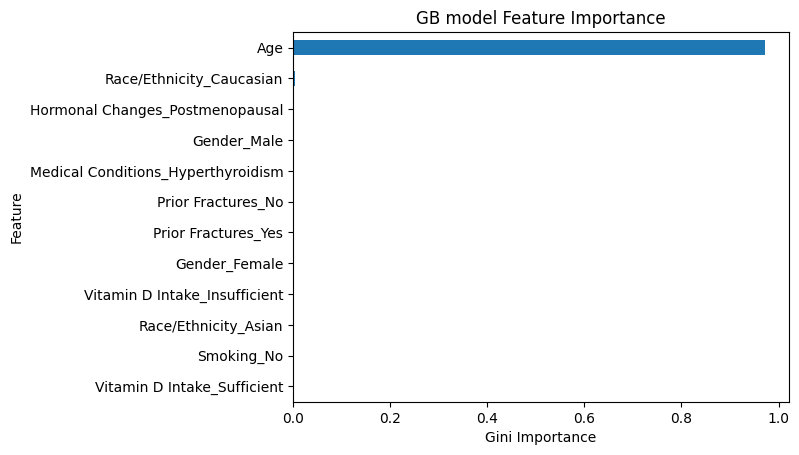

In [102]:
# Extracting importances from model
importances_gb1 = model_gb1.best_estimator_.named_steps['gradientboostingclassifier'].feature_importances_
# Creating a series with feature names and importances
feat_imp_gb1 = pd.Series(importances_gb1,index=features).sort_values()
# Plotting 10 most important features
feat_imp_gb1.tail(12).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("GB model Feature Importance");

In [103]:
#Showing all importances
feat_imp_gb1.sort_values(ascending=False)

,0
Age,0.972987
Race/Ethnicity_Caucasian,0.005016
Hormonal Changes_Postmenopausal,0.002268
Gender_Male,0.002172
Medical Conditions_Hyperthyroidism,0.002162
Prior Fractures_No,0.002138
Prior Fractures_Yes,0.001635
Gender_Female,0.001423
Vitamin D Intake_Insufficient,0.001275
Race/Ethnicity_Asian,0.001266


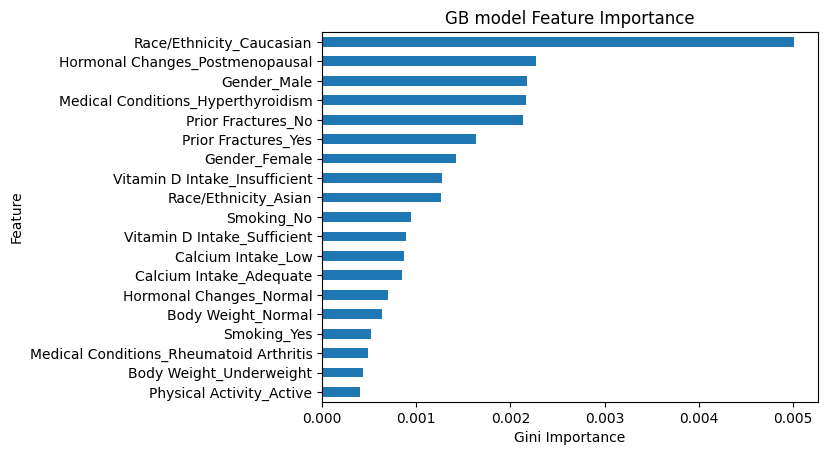

In [104]:
#Plotting gini barplot without "Age" to have a proper look
feat_imp_gb1.tail(20)[:-1].plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("GB model Feature Importance");

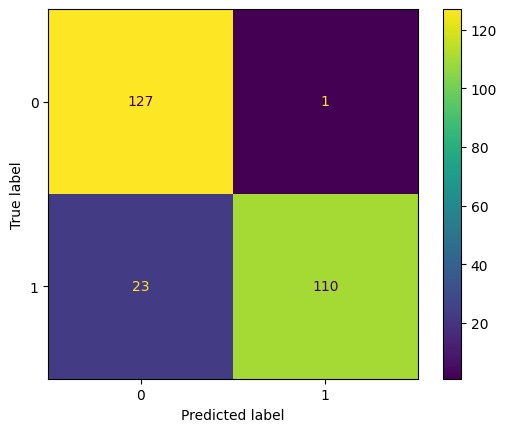

In [105]:
# Plotting a confusion matrix
ConfusionMatrixDisplay.from_estimator(model_gb1, X_test_1, y_test_1);

The original dataset worked better with imputing